### Build the classification model

In [13]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [14]:
train_data_dir = 'mnist-jpg/train'
test_data_dir = 'mnist-jpg/test'

In [15]:
# Image data generator for training data

train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_batch_size = 10000
test_batch_size = 5000

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(28, 28),  # Resize images to 28x28
    batch_size=train_batch_size,
    class_mode='categorical', 
    color_mode='grayscale',# Use 'categorical' for one-hot encoded labels
    shuffle=True,
)

# Load test data without labels (class_mode=None)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(28, 28),  # Resize images to 28x28
    batch_size=test_batch_size,
    class_mode='categorical',  # Use 'categorical' for one-hot encoded labels
    color_mode='grayscale',
    shuffle=True,
)

Found 60000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [16]:
x_train, y_train = train_generator[0]
x_test, y_test = test_generator[0]

In [17]:
print(x_train.shape, y_train.shape)

(10000, 28, 28, 1) (10000, 10)


In [9]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 64)                346176    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 347,146
Trainable params: 347,146
Non-trainable params: 0
__________________________________________________

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/5
157/157 [==============================] - 6s 29ms/step - loss: 0.5267 - accuracy: 0.8503 - val_loss: 0.2537 - val_accuracy: 0.9318
Epoch 2/5
157/157 [==============================] - 4s 27ms/step - loss: 0.2134 - accuracy: 0.9355 - val_loss: 0.1711 - val_accuracy: 0.9506
Epoch 3/5
157/157 [==============================] - 4s 27ms/step - loss: 0.1279 - accuracy: 0.9621 - val_loss: 0.1251 - val_accuracy: 0.9608
Epoch 4/5
157/157 [==============================] - 4s 26ms/step - loss: 0.0898 - accuracy: 0.9736 - val_loss: 0.1253 - val_accuracy: 0.9630
Epoch 5/5
157/157 [==============================] - 4s 27ms/step - loss: 0.0701 - accuracy: 0.9800 - val_loss: 0.0968 - val_accuracy: 0.9694


In [11]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Loss: ", test_loss)
print("Accuracy: ", test_accuracy)

157/157 [==============================] - 1s 4ms/step - loss: 0.0968 - accuracy: 0.9694
Loss:  0.09683765470981598
Accuracy:  0.9693999886512756


157/157 [==============================] - 1s 4ms/step
Actual Number:  1
Predicted Number:  1


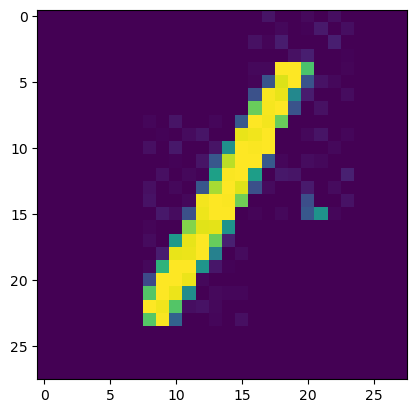

In [12]:
n = 25
plt.imshow(x_test[n])
predicted_value = model.predict(x_test)
print("Actual Number: ",np.argmax(y_test[n]))
print("Predicted Number: ", np.argmax(predicted_value[n]))